In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1> Exploration of GCP database</h1>

In [2]:
# Import the excel project
xls = pd.ExcelFile("../../../data/ghg-emissions/gcp/Global_Carbon_Budget_2020v1.0.xlsx")

print("List of excel sheets in the database: ")
print(xls.sheet_names)

List of excel sheets in the database: 
['Summary', 'Global Carbon Budget', 'Fossil Emissions by Category', 'Land-Use Change Emissions', 'Ocean Sink', 'Terrestrial Sink', 'Cement Carbonation Sink', 'Historical Budget']


<h2>Global Carbon Budget Sheet</h2>

All values in billion tonnes of carbon per year (GtC/yr), for the globe. For values in billion tonnes of carbon dioxide per year (GtCO2/yr) , multiply the numbers below by 3.664. Note: 1 billion tonnes C = 1 petagram of carbon (10^15 gC) = 1 gigatonne C = 3.664 billion tonnes of CO2

All uncertainties represent ± 1 sigma error (68 % chance of being in the range provided). Here are the uncertainties

<ul>
    <li> Emissions from fossil fuel combustion and industrial processes (uncertainty of ±5% for a ± 1 sigma confidence level) </li>
    <li>Emissions from land-use change (uncertainty of ±0.7 GtC/yr)</li>
    <li>The atmospheric CO2 growth rate (variable uncertainty around 0.2 GtC/yr from 1980) is estimated directly from atmospheric CO2 concentration measurements, and provided by the US National Oceanic and Atmospheric Administration Earth System Research Laboratory (NOAA/ESRL).  http://www.esrl.noaa.gov/gmd/ccgg/trends/global.html</li>
    <li>The ocean sink (uncertainty of ±0.4 GtC/yr on average) is estimated from the average of several global ocean biogeochemistry models that reproduce the observed mean ocean sink of the 1990s. </li>
    <li>The land sink (uncertainty of ±0.9 GtC/yr on average) was estimated from the average of several dynamic global vegetation models that reproduce the observed mean total land sink of the 1990s.</li>
    <li>The cement carbonation sink: no uncertainty given in database</li>
    
</ul>

This database estimates the various terms that play a role in the carbon cycle:<br/>
<center>
$E_{fos} + E_{luc} = G_{ATM} + S_{OCEAN} + S_{LAND} + B_{IM}$ 
</center>

where,
<ul>
    <li>$E_{fos}$ is the emission of $CO_{2}$ due to fossil fuel combustion and oxidation from all energy and industrial processes, also including cement production and carbonation.</li>
    <li>$E_{luc}$ is the emission of $CO_{2}$ resulting from deliberate human activities on land, including those leading to land-use change</li>
    <li>$G_{atm}$ is the increase of $CO_{2}$ in atmosphere resulting from the two previous sources</li>
    <li>$S_{OCEAN}$ is the increase of $CO_{2}$ in ocean resulting from the two previous sources </li>
    <li>$S_{LAND}$ is the increase of $CO_{2}$ in the land resulting from the two previous sources </li>
    <li>$B_{IM}$ is the balance uncertainty and is a measure of the imperfection of our data (<b>directly estimated using all other quantities, NOT estimated with data </b> </li>
</ul>


In [3]:
# Read dataframe
df_gcb = pd.read_excel(xls, 'Global Carbon Budget',header=20)

# Drop the unwanted columns that do not hold any data
df_gcb=df_gcb.iloc[:,:8]

# Drop the last lines corresponding to 2020 (only model) and commentary associated
df_gcb.drop(df_gcb.tail(4).index,inplace=True)

df_gcb.rename(columns={"fossil emissions excluding carbonation":"Fossil emissions excluding carbonation (GtC/yr)",
                   "land-use change emissions":"Land-use change emissions (GtC/yr)",
                   "atmospheric growth":"Atmospheric growth (GtC/yr)",
                   "ocean sink":"Ocean sink (GtC/yr)","land sink":"Land sink (GtC/yr)",
                   "cement carbonation sink":"Cement carbonation sink (GtC/yr)",
                   "budget imbalance":"Budget imbalance (GtC/yr)"},inplace=True)

# Change column Year to index
df_gcb.set_index("Year",inplace=True)

# Visual inspection
df_gcb.tail(3)

,Fossil emissions excluding carbonation (GtC/yr),Land-use change emissions (GtC/yr),Atmospheric growth (GtC/yr),Ocean sink (GtC/yr),Land sink (GtC/yr),Cement carbonation sink (GtC/yr),Budget imbalance (GtC/yr)
Year,,,,,,,
2017,9.742,1.521109,4.57722,2.519991,3.830033,0.203694,0.132171
2018,9.94,1.553637,5.08698,2.561091,3.776394,0.210856,-0.141683
2019,9.945622,1.802637,5.42682,2.625991,3.136743,0.215298,0.343408


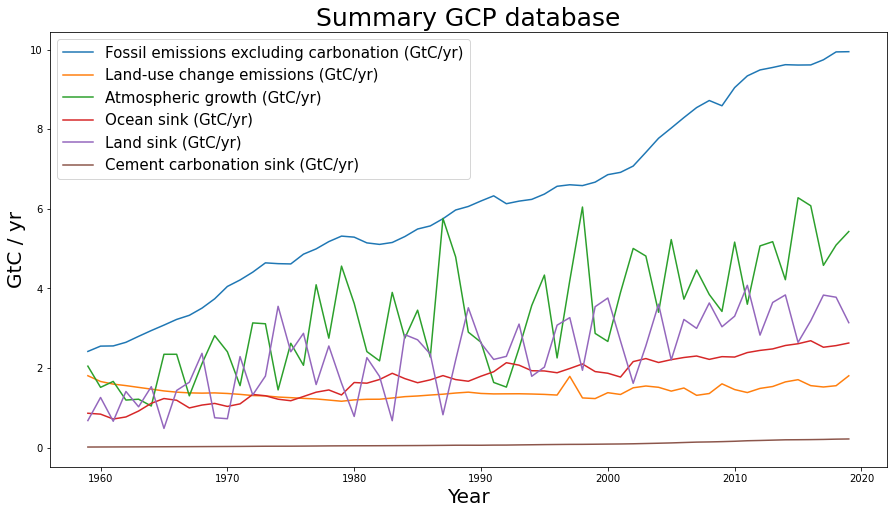

In [4]:
# Plotting
plt.figure(figsize=(15,8))
for name in df_gcb.columns:
    if name not in ["Budget imbalance (GtC/yr)"]:
        plt.plot(df_gcb.index,df_gcb[name],label=name)
plt.title("Summary GCP database",size=25)
plt.legend(prop={'size': 15})
plt.xlabel("Year",size=20)
plt.ylabel("GtC / yr",size=20)
ax=plt.gca()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

Text(0, 0.5, 'GtC / yr')

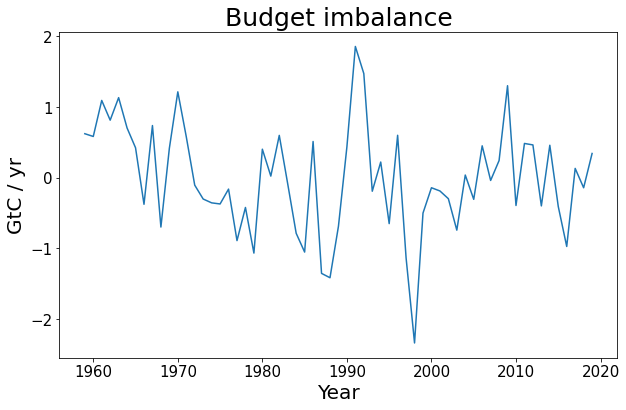

In [5]:
plt.figure(figsize=(10,6))

name="Budget imbalance (GtC/yr)"
plt.plot(df_gcb.index,df_gcb[name],label=name)
plt.title("Budget imbalance",size=25)
plt.xlabel("Year",size=20)
plt.ylabel("GtC / yr",size=20)

<h2>Fossil Emissions $E_{FOS}$ excluding carbonation</h2>

<h3> World level</h3>

The emissions are divided into several categories:
<ul>
    <li>Coal</li>
    <li>Oil</li>
    <li>Gas</li>
    <li>Cement emission</li>
    <li>Flaring</li>
    <li>Other (like processes involving the production of chemicals and fertilizers)</li>
</ul>

<b> It is important to note that, the CO2 sink from cement is NOT included here</b>. So, technically, the data given here are slighlty different from $E_{FOS}$ in Eq.1 that does include cement carbonation. 

<b>“cement carbonation”</b> ---> process in which from its creation cement starts to absorb CO2 from the atmosphere

The estimates given here are mainly based on energy consumption data. The main datasets used here are:
<ul>
    <li><b>Carbon Dioxide Information Analysis Center (CDIAC)</b>: Global and national emission estimates for coal, oil, natural gas, and peat fuel extractio for the time period 1750–2017. This database is interesting for the data between years 1750-1990</li>
    <li><b>UNFCCC</b>: Official national greenhouse gas inventory reports annually for 1990–2018 for 42 countries (very accurate)</li>
    <li><b>The BP Statistical Review of World Energy (BP)</b>: most up-to-date estimates of national energy statistics for the latest years </li>
    <li><b>Global and national cement emissions updated from Andrew (2019)</b>: include the latest estimates of cement production and clinker ratio</li>
</ul>

All values given here are in million tonnes of carbon per year (MtC/yr), except the per capita emissions which are in tonnes of carbon per person per year (tC/person/yr).

The uncertainty for the global estimates is about ±5 % for a ± 1 sigma confidence level. <br/>

In [6]:
# Read file
df_fe = pd.read_excel(xls, 'Fossil Emissions by Category',header=8)

# Drop blank columns
df_fe = df_fe.iloc[:,:9]

# Rename columns
df_fe.rename(columns={"fossil emissions excluding carbonation":"Fossil emissions excluding carbonation (MtC/yr)",
                     "Coal":"Coal (MtC/yr)","Oil":"Oil (MtC/yr)","Gas":"Gas (MtC/yr)",
                     "Cement emission":"Cement emission (MtC/yr)","Flaring":"Flaring (MtC/yr)",
                     "Other":"Other (MtC/yr)","Per Capita":"Per Capita (tC/person/yr)"},inplace=True)

# Change column Year to index
df_fe.set_index("Year",inplace=True)

# Visual inspection
df_fe.tail(3)

,Fossil emissions excluding carbonation (MtC/yr),Coal (MtC/yr),Oil (MtC/yr),Gas (MtC/yr),Cement emission (MtC/yr),Flaring (MtC/yr),Other (MtC/yr),Per Capita (tC/person/yr)
Year,,,,,,,,
2017,9742.000000,3934.000000,3323.000000,1942.000000,403.000000,110.000000,31.000000,1.290000
2018,9940.000000,3990.000000,3344.000000,2044.000000,413.000000,117.000000,31.000000,1.300000
2019,9945.622216,3919.912017,3371.755242,2078.524517,426.790548,117.220404,31.419487,1.289384


<h3>National level : Total</h3>

The GCP also includes another file that characterizes further more the fossil emissions at the country level. There are three main categories that are given here:
<ul>
    <li> Territorial Emissions</li>
    <li> Consumption Emissions</li>
    <li> Emissions Transfers</li>
</ul>

<h4>Territorial emission</h4>

Territorial Emissions is in direct correspondance with "Fossil emissions excluding carbonation". In fact, if one plots the value of Territorial Emission for the world as a function of year, it is exactly equal to the value of fossil emissions as a function of year (<code>see test plot below</code>)

The intersting part of this dataset is that we now have a division of the emission for the different countries. In addition, it is important to note that:
<center><b>world emission = all countries + bunker</b></center>

and the dataset indeed divides the bunker emissions in a separate category (<code>see below for test of that</code>)

In [7]:
# Import the excel project
xls_nl = pd.ExcelFile("../../../data/ghg-emissions/gcp/National_Carbon_Emissions_2020v1.0.xlsx")
print("List of excel sheets in the database: ")
print(xls_nl.sheet_names)

List of excel sheets in the database: 
['Summary', 'Territorial Emissions', 'Consumption Emissions', 'Emissions Transfers', 'Country Definitions', 'Disaggregation', 'Aggregation']


In [8]:
# Read dataframe
df_te = pd.read_excel(xls_nl, 'Territorial Emissions',header=11)
# Rename columns to year
df_te.rename(columns={"Unnamed: 0":"Year"},inplace=True)
# Drop unwanted columns
df_te=df_te.iloc[:,:234]
# Change index to year
df_te.set_index("Year",inplace=True)
df_te.tail(3)

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Asia,Central America,Europe,Middle East,North America,Oceania,South America,Bunkers,Statistical Difference,World
Year,,,,,,,,,,,,,,,,,,,,,
2017,1.872223,1.475000,41.880011,0.127000,10.226757,0.039000,0.134000,51.150640,1.496956,0.250000,...,4582.828278,47.223160,1536.005026,706.589153,1716.230472,125.809653,307.587932,340.774054,1.193710e-12,9742.453300
2018,2.852802,1.474618,44.844240,0.126695,10.283462,0.040160,0.137984,50.499426,1.718505,0.257433,...,4722.435175,48.189123,1528.872721,715.337820,1763.935023,126.584241,299.395430,345.985325,6.650680e-12,9939.877649
2019,2.925855,1.522657,46.863275,0.128410,10.376719,0.039108,0.134372,48.837212,1.639172,0.250695,...,4800.129169,49.345678,1487.043075,726.187206,1719.552567,125.781200,296.161653,345.985325,3.012700e-12,9945.622216


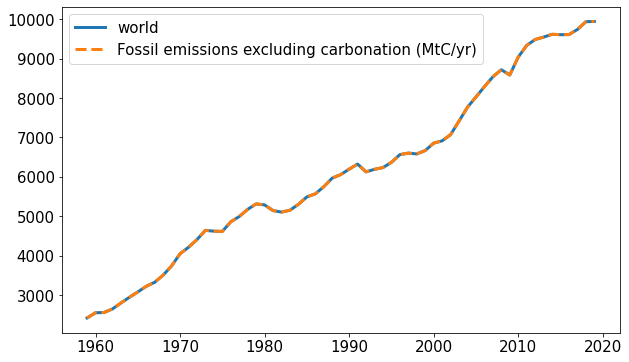

In [9]:
# Test plot 
plt.figure(figsize=(10,6))
plt.plot(df_te["World"],lw=3,label="world")
plt.plot(df_fe["Fossil emissions excluding carbonation (MtC/yr)"],ls="--",lw=3,label="Fossil emissions excluding carbonation (MtC/yr)")
plt.legend(fontsize=15)

In [10]:
# Test for 
print("Sum of all countries emission in 2019 : ",df_te.loc[2019][:217].sum())
print("Bunkers emission in 2019 : ",df_te.loc[2019]["Bunkers"])
print("World emission in 2019 : ",df_te.loc[2019]["World"])
print("Sum all countries + bunkers:",df_te.loc[2019][:217].sum()+df_te.loc[2019]["Bunkers"])

Sum of all countries emission in 2019 :  9599.636891251
Bunkers emission in 2019 :  345.9853247
World emission in 2019 :  9945.622216
Sum all countries + bunkers: 9945.622215951


<h4>Consumption and transfer emission</h4>

The datasets offers also even more details on the emission between year 1990 and 2017, by dividing the territorial emission as <br/><br/>
<center> <b>territorial = consumption + exports - import </b></center>
<br/>
where the exports and imports are grouped together as <b>transfer</b> emission (</code>see test below</code>)

This classification is done by the GCP using a trade model based on trade data from GTAP.

In [11]:
##### Consumption emission
df_ce = pd.read_excel(xls_nl, 'Consumption Emissions',header=8)
# Rename columns to year
df_ce.rename(columns={"Unnamed: 0":"Year"},inplace=True)
# Drop unwanted columns
df_ce=df_ce.iloc[:,:234]
# Change index to year
df_ce.set_index("Year",inplace=True)

df_ce.tail(3)

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Asia,Central America,Europe,Middle East,North America,Oceania,South America,Bunkers,Statistical Difference,World
Year,,,,,,,,,,,,,,,,,,,,,
2017,NaN,1.688320,NaN,NaN,NaN,NaN,NaN,53.163988,1.551230,NaN,...,4274.426018,40.207572,1610.781183,625.208109,1814.323190,116.680473,330.771843,340.774054,1.193710e-12,9742.453300
2018,NaN,1.699824,NaN,NaN,NaN,NaN,NaN,51.191129,1.737577,NaN,...,4403.795752,40.960020,1611.509922,631.848907,1863.855055,113.976446,322.378639,345.985325,6.650680e-12,9939.877649
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.985325,NaN,9945.622216


In [12]:
##### Transfer emission
df_et = pd.read_excel(xls_nl, 'Emissions Transfers',header=8)
# Rename columns to year
df_et.rename(columns={"Unnamed: 0":"Year"},inplace=True)
# Drop unwanted columns
df_et=df_et.iloc[:,:234]
# Change index to year
df_et.set_index("Year",inplace=True)

df_et.tail(3)

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Asia,Central America,Europe,Middle East,North America,Oceania,South America,Bunkers,Statistical Difference,World
Year,,,,,,,,,,,,,,,,,,,,,
2017,NaN,-0.213320,NaN,NaN,NaN,NaN,NaN,-2.013348,-0.054274,NaN,...,239.735472,-4.530487,-129.594812,5.937479,-98.253718,6.477485,-24.512400,0,0,0
2018,NaN,-0.225206,NaN,NaN,NaN,NaN,NaN,-0.691703,-0.019072,NaN,...,239.373141,-4.714551,-137.416716,7.648699,-100.081320,9.122431,-24.326942,0,0,0
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


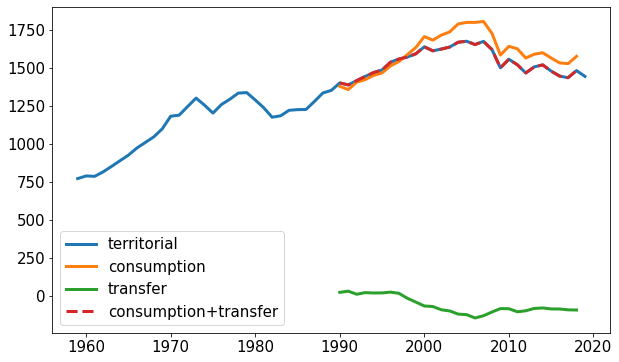

In [13]:
# Testing that territorial = consumption + transfer
plt.figure(figsize=(10,6))
country="USA"
plt.plot(df_te[country],label="territorial",lw=3)
plt.plot(df_ce[country],label="consumption",lw=3)
plt.plot(df_et[country],label="transfer",lw=3)
plt.plot(df_et[country]+df_ce[country],label="consumption+transfer",ls="--",lw=3)
plt.legend(fontsize=15)

<h3> National level : sector sub-division </h3>

The GCP also provides another csv file that details how the emissions are divided in each sub-sector for all countries.

<b>Careful</b> : the value are given in MtCO2 unlike all the other datframes in this notebook. For this reason, the values are converted in MtC.

In [15]:
df_sub = pd.read_csv("../../../data/ghg-emissions/gcp/GCB2020v18_MtCO2_flat.csv")

# Set the dataframe structure
df_sub.sort_values(["Year","Country"],inplace=True)
df_sub.set_index(["Year","Country"],inplace=True)

# Convert the MtCO2 in MtC (to be in adequation with the values from other dataset)
df_sub[["Total","Coal","Oil","Gas","Cement","Flaring","Other","Per Capita"]] = (1.0/3.664)* df_sub[["Total","Coal","Oil","Gas","Cement","Flaring","Other","Per Capita"]]

df_sub.tail(3)

ISO 3166-1 alpha-3     Total      Coal       Oil      Gas  \
Year Country                                                              
2019 Yemen                   YEM  2.798867  0.092000  2.137605  0.34078   
     Zambia                  ZMB  1.834195  0.512601  1.036221  0.00000   
     Zimbabwe                ZWE  2.831410  1.720523  0.952260  0.00000   

                 Cement  Flaring  Other  Per Capita  
Year Country                                         
2019 Yemen     0.228481      0.0    NaN    0.095977  
     Zambia    0.285373      0.0    NaN    0.102693  
     Zimbabwe  0.158627      0.0    NaN    0.193330

Just as a check, we see below that the total is inded the total of each sub-categories, and correspond to the value given in the territorial emission in the previous dataframe.

In [30]:
year = 2019
country = "Yemen"
value_tot = df_sub.loc[(year,country),"Total"]
value_sum = df_sub.loc[(year,country),["Coal","Oil","Gas","Cement","Flaring","Other"]].sum()
value_territorial = df_te.loc[year,country]
print("'Total' from df_sub : ",value_tot )
print("Sum of all-sub categories from df_sub : ",value_sum )
print("Value inside df_te : ",value_territorial )

'Total' from df_sub :  2.798866812227074
Sum of all-sub categories from df_sub :  2.7988665393013097
Value inside df_te :  2.798866727


<h2>Land-Use Change Emissions: $E_{LUC}$</h2>

This emission corresponds to the <b>net</b> flux of CO2 from land-use, land-use change and forestry. Some of the activities lead to emission or sinks, and the quantity here is the net flux that corresponds to emission (i.e. removing the sink). 

The data given here spans the period 1959-2019 and contain both <b>bookeeping</b> models and <b>dynamic global vegetation models</b> (DGVM).



<b>The annual estimate is the average of the three bookeeping models</b> (BLUE,HandN2017,OSCAR). These 3 models are based on the original bookkeeping approach of Houghton (2003) that keeps track of the carbon stored in vegetation and soils before and after a land-use change.

The DGVM are used to help quantify uncertainties (uncertainty of ±0.7 GtC/yr).

In Table A1 of the GCP paper, they describe the presence or absence of various sources in the 3 bookeeping models and DGVM that are divided as:

<ul>
    <li>Wood harvest and forest degradation</li>
    <li>Shifting cultivation/ Subgrid-scale transitions</li>
    <li>Cropland harvest</li>
    <li>Peat fires</li>
    <li>Fire as a management tool</li>
    <li>N fertilization</li>
    <li>Tillage</li>
    <li>Irrigation</li>
    <li>Wetland drainage</li>
    <li>Erosion</li>
    <li>Peat drainage</li>
    <li>Grazing and mowing harvest</li>
    <li>Fire simulation and/or suppression</li>
    <li>Climate and variability CO2 fertilization</li>
    <li>Carbon-nitrogen in- teractions, including N deposition</li>
</ul>
    



Here, the scientific $E_{LUC}$ definition is used, and counts fluxes due to environmental changes on managed land towards $S_{LAND}$, <b>as opposed to the national greenhouse gas inventories under the UNFCCC</b>, which include them in $E_{LUC}$ and thus often report smaller land-use emissions

In [ ]:
# Read file
df_lu = pd.read_excel(xls, 'Land-Use Change Emissions',header=28)

# Drop blank columns
df_lu.drop([df_lu.columns[i] for i in [2,6,20,24]],axis=1,inplace=True)
df_lu = df_lu.iloc[:,:23]

# Change column Year to index
df_lu.set_index("Year",inplace=True)

# Create multi-level indexing on columns to reflect the differences of the models.
columns_try=[]
for c in df_lu.columns:
    if c in ['H&N', 'BLUE', 'OSCAR']:
        columns_try.append(("Bookkeeping Models",c))
    elif c in ['CABLE-POP', 'CLASSIC', 'CLM5.0', 'DLEM','IBIS', 'ISAM', 'ISBA-CTRIP', 'JSBACH', 'JULES-ES', 
               'LPJ-GUESS ','LPJ ', 'LPX-Bern', 'OCNv2', 'SDGVM', 'VISIT', 'YIBs']:
        columns_try.append(("Individual DGVM Models",c))
    elif c in ['MMM (multi-model mean)', 'Model Spread (sd)']:
        columns_try.append(('Statistics',c))
    else:
        columns_try.append(('GCP',c))
df_lu.columns = pd.MultiIndex.from_tuples(columns_try)

# Visual inspection
df_lu.tail(3)

In [ ]:
# Test that GCP is indeed the average
print("Mean of the 3 bookkeeping models: ",df_lu.loc[2019][("Bookkeeping Models")].mean())
print(r"Value of E_{LUC}: ",df_lu.loc[2019][("GCP","GCB")])

<h2>Ocean Sink</h2>

Ocean CO2 sink (positive values represent a flux from the atmosphere to the ocean). All values in billion tonnes of carbon per year (GtC/yr), for the globe.

The ocean sink (uncertainty of ±0.4 GtC/yr on average) is estimated from the average of several global ocean biogeochemistry models that reproduce the observed mean ocean sink of the 1990s.  Cite as: Friedlingstein et al (2020; see summary tab)

Note: the data products include a pre-industrial steady state source of CO2 from rivers (of about 0.61 GtC/yr) and therefore are not directly comparable with the ocean model results

In [ ]:
# Read data
df_os = pd.read_excel(xls, 'Ocean Sink',header=24)

# Drop blank columns
df_os.drop([df_os.columns[i] for i in [3,13,16,24]],axis=1,inplace=True)
df_os=df_os.iloc[:,:21]

df_os.rename(columns={"year":"Year"},inplace=True)

# Change column Year to index
df_os.set_index("Year",inplace=True)

# Create multi-level indexing on columns to reflect the differences of the models.
columns_try=[]
for c in df_os.columns:
    if c in ['CESM-ETH', 'CSIRO', 'FESOM', 'MPI','CNRM', 'PlankTOM', 'NorESM', 'Princeton', 
             'IPSL','MMM (multi-model mean)', 'Model Spread (sd)']:
        columns_try.append(("GOBM",c))
    elif c in ['MPI-SOMFFN', 'Jena-MLS','CMEMS', 'CSIR', 'Watson','mean data-products (excl. Watson.)',
               'sd data-products (excl. Watson.)']:
        columns_try.append(("Data-based products",c))
    else:
        columns_try.append(('GCP',c))
df_os.columns = pd.MultiIndex.from_tuples(columns_try)


# Visual inspection
df_os.head(3)

<h2>Terrestrial Sink</h2>

Terrestrial CO2 sink (positive values represent a flux from the atmosphere to the land). All values in billion tonnes of carbon per year (GtC/yr), for the globe. 

Methods: The terrestrial sink (uncertainty of ±0.9 GtC/yr on average) is estimated from the average of several Dynamic Global Vegetation Models (DGVMs) that reproduce the observed mean total land uptake of the 1990s.  Cite as: Friedlingstein et al (2020; see summary tab)

In [ ]:
# Read data
df_ts = pd.read_excel(xls, 'Terrestrial Sink',header=24)

# Drop blank columns
df_ts.drop([df_ts.columns[i] for i in [2,20]],axis=1,inplace=True)
df_ts=df_ts.iloc[:,:21]

# Change column Year to index
df_ts.set_index("Year",inplace=True)

# Create multi-level indexing on columns to reflect the differences of the models.
columns_try=[]
for c in df_ts.columns:
    if c in ['CABLE-POP', 'CLASSIC', 'CLM5.0', 'DLEM', 'IBIS', 'ISAM','ISBA-CTRIP', 'JSBACH', 'JULES-ES', 
             'LPJ-GUESS ', 'LPJ ', 'LPX-Bern','OCNv2', 'ORCHIDEE-v3', 'SDGVM', 'VISIT', 'YIBs',
             'MMM (multi-model mean)', 'Model Spread (sd)']:
        columns_try.append(("DGVM models",c))
    else:
        columns_try.append(('GCP',c))
df_ts.columns = pd.MultiIndex.from_tuples(columns_try)

# Visual inspection
df_ts.head(3)

<h2>Cement Carbonation Sink</h2>

Cement Carbonation sink (positive values represent a flux from the atmosphere to the land). All values in million tonnes of carbon per year (MtC/yr).

Methods: Full details of the method are described in Friedlingstein et al (2020).

In [ ]:
# Read data
df_ccs = pd.read_excel(xls, 'Cement Carbonation Sink',header=9)

# Drop blank columns
df_ccs.drop([df_ccs.columns[i] for i in [2]],axis=1,inplace=True)
df_ccs=df_ccs.iloc[:,:4]

# Change column Year to index
df_ccs.set_index("Year",inplace=True)

# Visual inspection
df_ccs.head(3)

<h2>Historical Budget</h2>

There is also a historical budget, where more past years are available. But this is not very interesting for us, as all the information for recent years are common with the ones in the global carbon budget sheet.

In [34]:
df_his = pd.read_excel(xls, 'Historical Budget',header=15)
df_his.head(3)

,Year,fossil emissions excluding carbonation,land-use change emissions,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1750,0.002552,NaN,-0.077592,NaN,0.173773,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1751,0.002552,NaN,-0.073988,NaN,-0.452640,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1752,0.002553,NaN,-0.070596,NaN,-0.280658,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
